In [103]:
from instaloader import Instaloader, Profile, TopSearchResults, Hashtag
#DataFrames
import pandas as pd
import numpy as np
#Pandas tqdm
from tqdm import tqdm, tqdm_notebook
# instantiate
tqdm.pandas(tqdm_notebook)

#Plotting
import matplotlib.pyplot as plt

#Clase
from IPython.display import clear_output

#Randmo
import random

Creating Niche

In [2]:
LISTA_NICHOS = ['motivacion', 'emprendimiento', 'trabajadesdecasa', 'exito']
#USER = 'e2varadero'
#PASSWORD = 'eskina123'

In [3]:
L = Instaloader()
#L.login(USER, PASSWORD)

## Get Top Influencers

The first thing to do is get the leader accounts in the sector

In [4]:
top_searchs = [TopSearchResults(L.context, x) for x in LISTA_NICHOS]

In [5]:
#Get best profiles from topsearchs generator in the niche
profiles_nested = [x.get_profiles() for x in top_searchs]
profiles = []
for sublist in profiles_nested:
    for item in sublist:
        profiles.append(item)

In [6]:
#Get some data from profiles. Mediacount and followers
#create DF
profiles_df = pd.DataFrame(profiles, columns=['profile'])
#Get profiles > 5000 followers
tqdm.pandas()
profiles_df['followers_num'] = profiles_df['profile'].progress_apply(lambda x: x.followers if x.followers > 5000 else np.nan)
profiles_df.dropna(inplace=True)
profiles_df.reset_index(inplace=True)
#get mediacount and username
profiles_df['media_count'] = profiles_df['profile'].apply(lambda x: x.mediacount)
profiles_df['username'] = profiles_df['profile'].apply(lambda x: x.username)

100%|██████████| 163/163 [06:26<00:00,  2.37s/it]


Now we have a DataFrame with profiles and some data. lets's see

In [7]:
profiles_df.head()

,index,profile,followers_num,media_count,username
0,0,<Profile motivacion.exito_ (16003564529)>,24239.0,803,motivacion.exito_
1,1,<Profile energiapersonal (5462118528)>,147957.0,1125,energiapersonal
2,2,<Profile motivaciongym_ (588173955)>,230183.0,1834,motivaciongym_
3,3,<Profile motivacion24fit (21040927824)>,57780.0,467,motivacion24fit
4,4,<Profile motivacionfitness_10 (6032767522)>,192586.0,445,motivacionfitness_10


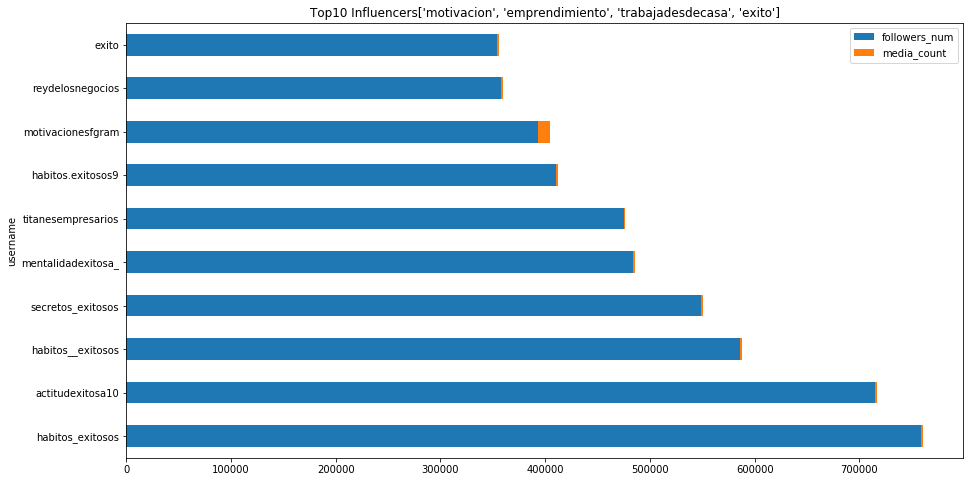

In [8]:
profiles_df.sort_values(by='followers_num', ascending=False).head(10).plot.barh(
    y = ['followers_num', 'media_count'],
    x = 'username',
    stacked = True,
    figsize = (15,8),
    title = 'Top10 Influencers{}'.format(LISTA_NICHOS),
    )

In [9]:
# on the one hand, Followers are a good indicator, but it's not the best. On the other hand, engagment is an excellent indicator, becouse it mesures the complicity with the fans, and the cuality of the posts.

Lets get total likes and comments and hashtags just form last X posts

In [10]:
POST_NUM = 20
def get_profiles_data(prof):
    total_num_likes = 0
    total_num_comments = 0
    hashtags = []
    count = 1
    for post in prof.get_posts():
        total_num_likes += post.likes
        total_num_comments += post.comments
        hashtags = hashtags + post.caption_hashtags
        if count == POST_NUM:
            break
        count +=1    
    return total_num_likes, total_num_comments, hashtags, len(hashtags)/count, count

In [11]:
p_data = profiles_df['profile'].progress_apply(get_profiles_data)
#extract data
profiles_df['likes'] = p_data.apply(lambda x: x[0])
profiles_df['comments'] = p_data.apply(lambda x: x[1])
profiles_df['hashtags'] = p_data.apply(lambda x: x[2])
profiles_df['num_hashtags'] = p_data.apply(lambda x: x[3])
profiles_df.num_hashtags.astype(np.int64)
profiles_df['engagement'] =100*((profiles_df.likes + profiles_df.comments) / (profiles_df.followers_num * POST_NUM))

100%|██████████| 97/97 [03:58<00:00,  2.46s/it]


In [12]:
profiles_df.sort_values(by='engagement', ascending=False)

,index,profile,followers_num,media_count,username,likes,comments,hashtags,num_hashtags,engagement
11,11,<Profile tumimotivacion (33626806491)>,11749.0,79,tumimotivacion,60278,646,"[tumimotivacion, reflexio, buenasvibras, mutuo...",27.30,25.927313
6,6,<Profile motivacion_fut_bolera (11151841539)>,56644.0,1180,motivacion_fut_bolera,137229,1752,[],0.00,12.267937
78,133,<Profile exitodemente (11927128402)>,54860.0,605,exitodemente,99824,672,"[sabiasque, curiosidades, impresionante, curio...",23.35,9.159315
88,148,<Profile rutinasexito (23222603538)>,23905.0,734,rutinasexito,40635,565,"[riqueza, exitofinanciero, lograr, riquezas, p...",21.50,8.617444
38,42,<Profile sopromotivacional (33074590220)>,26405.0,174,sopromotivacional,27549,829,[],0.00,5.373603
...,...,...,...,...,...,...,...,...,...,...
93,154,<Profile grupoexito (481805086)>,49155.0,1452,grupoexito,2571,601,"[juntosconstruimospaís, surtimayorista, barran...",1.80,0.322653
45,53,<Profile movimientovisionario (3298838406)>,298796.0,2124,movimientovisionario,13389,138,"[movimientovisionario, coachtransformacional, ...",4.70,0.226358
17,17,<Profile movimientovisionario (3298838406)>,298796.0,2124,movimientovisionario,13389,138,"[movimientovisionario, coachtransformacional, ...",4.70,0.226358
14,14,<Profile mentormotivacion (1551298050)>,284620.0,4272,mentormotivacion,7994,54,"[caballeroanonimo, millones, motivaciondiaria,...",25.95,0.141381


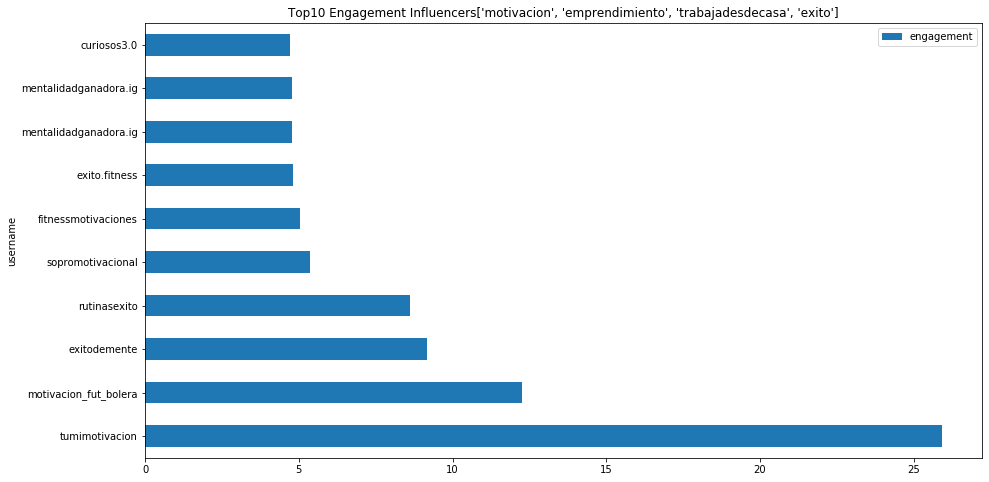

In [13]:
profiles_df.sort_values(by='engagement', ascending=False).head(10).plot.barh(
    y = 'engagement',
    x = 'username',
    figsize = (15,8),
    title = 'Top10 Engagement Influencers{}'.format(LISTA_NICHOS),
    )

## Now let's see how many hashtags are better for the engagement

In [14]:
#Delete accounts with 0 and more than 30 hashtags
hashtag_filter_df = profiles_df[profiles_df['num_hashtags'] > 0 ]
hashtag_filter_df = hashtag_filter_df[hashtag_filter_df['num_hashtags'] <= 30]
hashtag_filter_df['num_hashtags'] = hashtag_filter_df['num_hashtags'].round()

#create dfs
hashtag_eng_df = hashtag_filter_df.groupby('num_hashtags')['engagement'].mean()
hashtag_count_df = hashtag_filter_df.groupby('num_hashtags')['engagement'].count()

#Create cuts by 5
#hashtag_count_df = hashtag_count_df.groupby(pd.cut(hashtag_count_df.index, np.arange(0, 31, 5))).mean()
#hashtag_count_df.index = hashtag_count_df.index.astype(str)

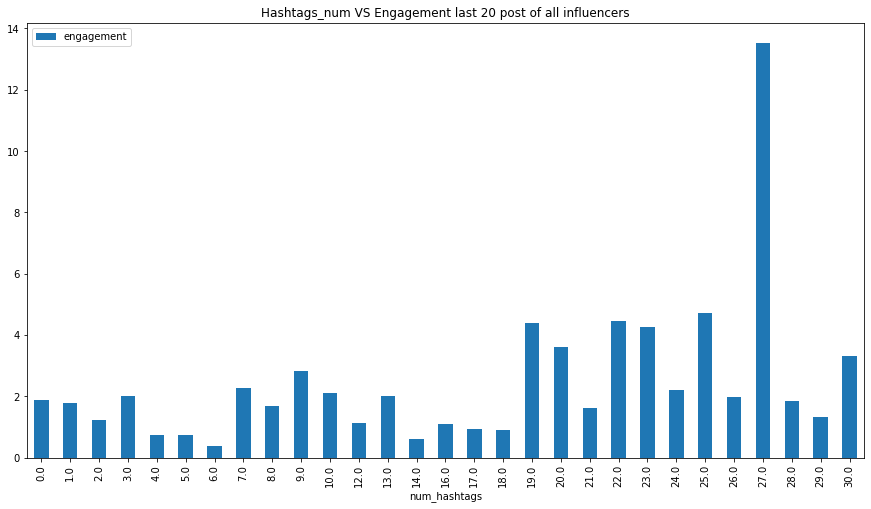

In [15]:
#PLOT
#ax, fig = plt.subplot(1, 2)
hashtag_eng_df.plot(kind='bar', 
stacked=True, 
legend="top_left", 
title="Hashtags_num VS Engagement last {} post of all influencers".format(POST_NUM),
figsize = (15, 8)
)

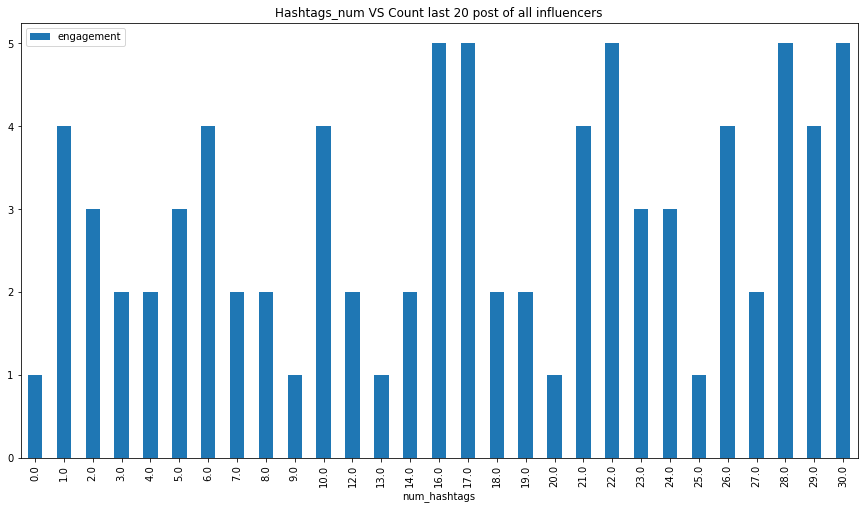

In [16]:
hashtag_count_df.plot(kind='bar', 
stacked=True, 
legend="top_left", 
title="Hashtags_num VS Count last {} post of all influencers".format(POST_NUM),
figsize = (15, 8)
)

Now, we are going to make a hashtag dataframe from influencers hashtags

In [17]:
h_df = profiles_df.explode('hashtags').dropna().groupby('hashtags').agg(
    {'engagement':'mean',
    'profile':'count'}
    ).sort_values('profile', ascending=False, ).reset_index()

We are going to use hashtags that has a % of max()

In [18]:
TRESHOLD = 0.35
h_df = h_df[h_df['profile'] > h_df['profile'].max()*TRESHOLD]

## Now that we have the hashtags that influencers un our niche use, we are going to clasificate them by stairs strategy

In [19]:
%%time
h_df['mediacount'] = h_df['hashtags'].progress_apply(lambda x: Hashtag.from_name(L.context, x).mediacount)

100%|██████████| 24/24 [01:19<00:00,  3.32s/it]Wall time: 1min 19s



In [20]:
def get_group(mcount):
    if mcount >= 5000 and mcount <= 50000:
        group = 'small'
    elif mcount > 50000 and mcount <= 500000:
        group = 'medium'
    elif mcount > 500000:
        group = 'big'
    return group

h_df['group'] = h_df['mediacount'].apply(get_group).dropna()

In [21]:
h_df.groupby('group').count()

,hashtags,engagement,profile,mediacount
group,,,,
big,24,24,24,24


In [45]:
class Niche():
    """This class scraps hashtags from instagram. according to an stairs strategy
    """    

    def __init__(self):
        """Init method of the class
        """
        #other attributs
        #self.hash_df = pd.DataFrame(columns = ['name', 'id', 'hashtag', 'mediacount', 'group', 'related_hash'])
        self.L = Instaloader()
        #self.L.login("testdeidilio", "test12345678")
        
        self.hashtag_dict = {}
        self.discarded_list = [] #a list with all the discarded hashtags on the process
        #groups
        self.small_count = False
        self.medium_count = False
        self.big_count = False
        #group limits
        self.big_limit = 0
        self.medium_limit = 0
        self.small_limit = 0
        self.done = False
        counter = 0
        self.strategy = []
    
    def hashtags_search(self, size, hash_df, big=False, medium=False, small=False):
        """
           This function scratch for "size" hashtags related with the given niche

           Arguments:
               key_words {list} -- [the key_words of the nich]
               **kwargs:
                   big, medium, small -- {int} 
                   
        """
        #create a dict from df
        hash_df['H'] = hash_df.hashtags.apply(lambda x: Hashtag.from_name(L.context, x))
        self.hashtag_dict = dict(zip(hash_df.H, hash_df.mediacount))

        #set group limits
        if not big:
            self.big_limit = size*0.2
        else:
            self.big_limit = big        
        if not medium:
            self.medium_limit = size*0.3
        else:
            self.medium_limit = medium
        if not small:
            self.small_limit = size*0.5
        else:
            self.small_limit = small
   
        #upgrade counts
        if (hash_df['group'] == 'big').any():
            self.big_count = hash_df.groupby('group')['hashtags'].count()['big']
        else:
            self.big_count = 0
        
        if (hash_df['group'] == 'medium').any():
            self.medium_count = hash_df.groupby('group')['hashtags'].count()['medium']
        else:
            self.medium_count = 0
        
        if (hash_df['group'] == 'small').any():
            self.small_count = hash_df.groupby('group')['hashtags'].count()['small']
        else:
            self.small_count = 0

        counter = 0
        self.done = False   
        
        while not self.done:
            try:
                h = list(self.hashtag_dict.keys())[counter]
                print('analizados--', counter)            
            except:
                break
         
            #get realated generator from dict    
            related_gen =  h.get_related_tags() #creating a related generator

            #convert to list of Hashtags Objects
            related = list(related_gen)
            
            #pick tested ones
            probados = self.discarded_list + list(self.hashtag_dict.keys())           
            #print("probados--{}".format(probados)) #--debug
            
            #pick just the news (not in df, not in discarded)
            nuevos = list(set(related) - set(probados))     
            
            #Stair strategies. Clasify
            if len(nuevos) == 0:
                counter+=1
                continue
            self.stairs(new_data = nuevos)
            counter+=1
        
    def stairs(self, new_data):
        """
            This function apply the stair strategie to a list of hashtags and divide them in 3 groups:
            group1 = 5k to 50k (50%) small
            group2 = 50k to 500k (30%) medium
            group3 = + 500k (20%) big
             Arguments:
            new_data {list} -- [list of related new hashtags]
        """        
        for H in new_data: # x is a single hashtag, new_data is a list of hashtag objects
            self.printstatus(x = H)
            mediacount = H.mediacount

            if self.small_count < self.small_limit and mediacount >= 5000 and mediacount <= 50000:
                #append to dataFeame
                self.hashtag_dict[H] = mediacount
                self.small_count += 1

            elif self.medium_count < self.medium_limit and mediacount > 50000 and mediacount <= 500000:
                #append to dataFeame
                self.hashtag_dict[H] = mediacount
                self.medium_count += 1

            elif self.big_count < self.big_limit and mediacount > 500000:
                #append to dataFeame
                self.hashtag_dict[H] = mediacount
                self.big_count += 1           
            else:
               #create a discarted list in order to optimise
               self.discarded_list.append(H)        
            
            #check limits
            if self.big_count >= self.big_limit and self.medium_count >= self.medium_limit and self.small_count >= self.small_limit:
                self.done = True
                break

    def hashtags_search_by_top(self, size, keywords):
        #iterate keywords
        for h in keywords:
            h_class = instaloader.Hashtag.from_name(self.L.context, h)
            top_post_gen = h_class.get_top_posts()
            for post in top_post_gen:
                post.get_           
            h.get_top_posts()   
    
    def write_strategy(self, number):
        #divide
        rang1 = self.hash_df.name[self.hash_df["group"] == "small"]
        rang2 = self.hash_df.name[self.hash_df["group"] == "medium"]
        rang3 = self.hash_df.name[self.hash_df["group"] == "big"]
        #get samples
        self.strategy = (rang1.sample(round(number*0.5)).tolist() + rang2.sample(round(number*0.3)).tolist() + rang3.sample(round(number*0.2)).tolist())
        #self.strategy.append("idiliodigital")
        print(self.strategy)

        with open('strategy_list.txt', 'w', encoding='utf-8') as f:
            f.truncate(0)
            for item in self.strategy:
                f.write("#%s," % item)
        return self.strategy
    
    def printstatus(self, x):
        clear_output()
        print("analizing---> {}".format(x.name)) #--debug
        print("*****Status*****")
        #print(df_count)
        print('Big-----', self.big_count, 'of ', int(self.big_limit))
        print('Medium--', self.medium_count, 'of ', int(self.medium_limit))
        print('Small---', self.small_count, 'of ', int(self.small_limit))
        #print founded number and list of founded
        print("____________")
        print("funded --> {}".format(len(self.hashtag_dict)))
        print('analizados -->', len(self.hashtag_dict) + len(self.discarded_list))
        print('____________')
        print(list(self.hashtag_dict.keys()))

In [46]:
nicho = Niche()

In [47]:
%%time
nicho.hashtags_search(size = 100, hash_df = h_df)

analizados-- 0
analizando-- <Hashtag #motivacion>
related-- <generator object Hashtag.get_related_tags at 0x000001FCF01946C8>


NameError: name 'probados' is not defined

In [25]:
new_df = pd.DataFrame.from_dict(nicho.hashtag_dict, orient='index').reset_index()
new_df.columns = ['hashtag', 'mediacount']

In [26]:
new_df['group'] = new_df.mediacount.apply(get_group)
new_df['hashtag_name'] = new_df.hashtag.apply(lambda x: x.name)

In [27]:
new_df.to_csv('Data/emprendimiento.csv')
#new_df = pd.read_csv('Data/emprendimiento.csv')

In [28]:
big_df = new_df[new_df['group'] == 'big']
medium_df = new_df[new_df['group'] == 'medium']
small_df = new_df[new_df['group'] == 'small']

In [31]:
BUSINESS_HASHTAG = 'idiliodigital'
#random number of hashtag betwen 20 and 30.
num_hash = random.randint(20, 30)
big = random.sample(big_df.hashtag_name.to_list(), int(num_hash*0.2))
medium = random.sample(medium_df.hashtag_name.to_list(), int(num_hash*0.3))
small = random.sample(small_df.hashtag_name.to_list(), int(num_hash*0.5))


final_list = big + medium + small
random.shuffle(final_list)
final_list.pop()
final_list.append(BUSINESS_HASHTAG)
random.shuffle(final_list)
for x in (final_list):
    print('#'+x, end=' ')
print('')
print(len(final_list))

ValueError: Sample larger than population or is negative

In [108]:
lista_df

,hashtags,Hashtag,mediacount
0,#lograr,<Hashtag #lograr>,148232
1,#dinero,<Hashtag #dinero>,3604780
2,#motivacion,<Hashtag #motivacion>,11073039
3,#libertadfinanciera,<Hashtag #libertadfinanciera>,2036742
4,#poderdelamente,<Hashtag #poderdelamente>,22848
...,...,...,...
154,#millonario,<Hashtag #millonario>,959441
155,#saldetuzonadeconfort,<Hashtag #saldetuzonadeconfort>,29140
166,#soyemprendedora,<Hashtag #soyemprendedora>,98767
169,#emprendedoresunidos,<Hashtag #emprendedoresunidos>,156936


In [117]:
def get_group(mcount):
    if mcount >= 5000 and mcount <= 50000:
        group = 'small'
    elif mcount > 50000 and mcount <= 500000:
        group = 'medium'
    elif mcount > 500000:
        group = 'big'
    else:
        group = None
    return group

lista_df['group'] = lista_df['mediacount'].apply(get_group).dropna()

In [120]:
lista_df.dropna(inplace=True)

In [121]:
big_df = lista_df[lista_df['group'] == 'big']
medium_df = lista_df[lista_df['group'] == 'medium']
small_df = lista_df[lista_df['group'] == 'small']

In [125]:
big_df.hashtags.to_list()

['#dinero',
 '#motivacion',
 '#libertadfinanciera',
 '#emprender',
 '#emprende',
 '#emprendedores',
 '#educacionfinanciera',
 '#emprendimiento',
 '#abundancia',
 '#emprendedor',
 '#sueños',
 '#esfuerzo',
 '#actitud',
 '#liderazgo',
 '#actitudmillonaria',
 '#metas',
 '#actitudpositiva',
 '#inspiracion',
 '#riqueza',
 '#prosperidad',
 '#millonario']

In [126]:
medium_df.hashtags.to_list()

['#lograr',
 '#emprededor',
 '#logro',
 '#vidapositiva',
 '#inteligenciafinanciera',
 '#jovenesemprendedores',
 '#exitopersonal',
 '#despertarespiritual',
 '#negociosdigitales',
 '#persevera',
 '#yopiensoenpositivo',
 '#empredimiento',
 '#emprendedoresonline',
 '#inspiraciones',
 '#sabiduría',
 '#trabajoduro',
 '#emprededores',
 '#emprendiendo',
 '#vivesinlimites',
 '#superate',
 '#emprendimientos',
 '#soyemprendedor',
 '#soyemprendedora',
 '#emprendedoresunidos',
 '#liderazgopersonal']

In [127]:
small_df.hashtags.to_list()

['#poderdelamente',
 '#pienseyhagaserico',
 '#trabajaonline',
 '#saliradelante',
 '#actitudganadora',
 '#gereriqueza',
 '#actitudybuenavibra',
 '#creencia',
 '#norendirse',
 '#motivacionempresarial',
 '#trabajointerior',
 '#trabajaduro',
 '#centrate',
 '#riquezasemlimites',
 '#negociodelsiglo21',
 '#dineroonlíne',
 '#tupuedescontodo',
 '#constanciaydisciplina',
 '#afirmacion',
 '#menteganadora',
 '#autoeducacion',
 '#enprendimiento',
 '#habitosmillonarios',
 '#inspiracionpositiva',
 '#emprendores',
 '#millonariosjovenes',
 '#microempresario',
 '#emprenderconexito',
 '#logralo',
 '#frasesparaelalma',
 '#emprendedorescolombianos',
 '#progresar',
 '#abundancia2020',
 '#empezardecero',
 '#jurgenklaric',
 '#crecimientopersonalyespiritual',
 '#pensamientospositivo',
 '#logrosdevida',
 '#saldetuzonadeconfort']

In [5]:
big = ['#poderdelamente',
 '#pienseyhagaserico',
 '#trabajaonline',
 '#saliradelante',
 '#actitudganadora',
 '#gereriqueza',
 '#actitudybuenavibra',
 '#creencia',
 '#norendirse',
 '#motivacionempresarial',
 '#trabajointerior',
 '#trabajaduro',
 '#centrate',
 '#riquezasemlimites',
 '#negociodelsiglo21',
 '#dineroonlíne',
 '#tupuedescontodo',
 '#constanciaydisciplina',
 '#afirmacion',
 '#menteganadora',
 '#autoeducacion',
 '#enprendimiento',
 '#habitosmillonarios',
 '#inspiracionpositiva',
 '#emprendores',
 '#millonariosjovenes',
 '#microempresario',
 '#emprenderconexito',
 '#logralo',
 '#frasesparaelalma',
 '#emprendedorescolombianos',
 '#progresar',
 '#abundancia2020',
 '#empezardecero',
 '#jurgenklaric',
 '#crecimientopersonalyespiritual',
 '#pensamientospositivo',
 '#logrosdevida',
 '#saldetuzonadeconfort']